In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\raw\Delivery_data.csv")

In [3]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [4]:
columns_required = ['Delivery_person_Age','Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)']

In [5]:
df = df[['Delivery_person_Age','Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)']]

In [6]:
df.shape

(45584, 17)

# convert data types to int64


In [7]:
def convert_cols_to_int64(df, col_list):
    """
    Converts columns in a pandas DataFrame to the 'Int64' dtype.
    
    Args:
        df (pandas DataFrame): The DataFrame to modify.
        col_list (list): A list of column names to convert.
    
    Returns:
        None
    """
    for i in col_list:
        df[i] = df[i].astype('Int64')
    return df


convert_list = ["Delivery_person_Age","multiple_deliveries"]
df = convert_cols_to_int64(df,convert_list)

# drop duplicates and na rows

In [8]:
# drop nun values and duplicate if any
def drop_na_dup(df_test:pd.Series):
    df = df_test.copy()
    nas = []
    if max([i  for i in df.isna().sum()])>0:
        df = df.dropna(axis=0)
    elif max([i  for i in df.duplicated()]):
        df = df.drop_duplicates(axis=0)

    try:
        # regex expression 
        df = df[df['Time_Orderd'].str.contains(r'^\d{2}:\d{2}$')] 
        df = df[df['Time_Order_picked'].str.contains(r'^\d{2}:\d{2}$')]
    except:
        pass

    if df.shape[0]>500:
        print("values are more than 500")
    else:
        print("values are less than 500")
        
    return df



In [9]:
df = drop_na_dup(df)
df.shape

values are more than 500


(33402, 17)

# Process time column and add catagory

In [10]:
# process time data 

def convert_to_daytime_cat(time_str):
    """
    Converts a string representing a time value in 24-hour format
    to a categorical label for the corresponding day-time.
    """
    hour = int(time_str.split(':')[0])
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    elif 21 <= hour < 24 or 0 <= hour < 2:
        return "night"
    else:
        return 'midnight'

In [11]:
# hours = [i for i in range(0,24)]
# for hour in hours:
#     if 6 <= hour < 12:
#         print('morning')
#     elif 12 <= hour < 17:
#         print ('afternoon')
#     elif 17 <= hour < 21:
#         print ('evening')
#     elif 21 <= hour < 24:
#         print ("night")
#     else:
#         print ('mid night')

In [12]:
# Assuming your DataFrame is called df and the column with time values is 'Time_Order_picked':
df['Daytime'] = df['Time_Order_picked'].apply(convert_to_daytime_cat)

In [13]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Daytime
0,36,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46,night
1,21,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1,No,Metropolitian,23,afternoon
2,23,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1,No,Metropolitian,21,evening
3,34,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,20,morning
4,24,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,41,evening


In [14]:
len(df)

33402

In [15]:
def order_time_difference(df_test, order_col='Time_Orderd', picked_col='Time_Order_picked',
                          output_col='Time_Difference_Minutes'):
    """
    Calculates the time difference in minutes between two columns in a pandas DataFrame.
    
    Args:
        df (pandas DataFrame): The DataFrame containing the time columns.
        order_col (str): The name of the column containing the order time.
        picked_col (str): The name of the column containing the picked-up time.
        output_col (str): The name of the output column to create.
        
    Returns:
        pandas DataFrame: The modified DataFrame with the time difference column added.
    """
    df =df_test.copy()
    # Convert time strings to datetime objects
    df[order_col] = pd.to_datetime(df[order_col], format='%H:%M')
    df[picked_col] = pd.to_datetime(df[picked_col], format='%H:%M')

    # Calculate time difference in minutes
    df[output_col] = ((df[picked_col] - df[order_col]).dt.total_seconds() / 60).astype(int)
    
    # Create columns for hour and minute values
    df['Order_Hour'] = df[order_col].dt.hour
    df['Order_Minute'] = df[order_col].dt.minute
    df['Picked_Hour'] = df[picked_col].dt.hour
    df['Picked_Minute'] = df[picked_col].dt.minute
    df = df.drop([order_col,picked_col],axis=1)
    
    return df

In [16]:
df = order_time_difference(df, order_col="Time_Orderd", picked_col="Time_Order_picked", output_col="Time_Difference_Minutes" )

In [17]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken (min),Daytime,Time_Difference_Minutes,Order_Hour,Order_Minute,Picked_Hour,Picked_Minute
0,36,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,3,No,Metropolitian,46,night,15,21,55,22,10
1,21,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,1,No,Metropolitian,23,afternoon,10,14,55,15,5
2,23,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,1,No,Metropolitian,21,evening,10,17,30,17,40
3,34,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,0,No,Metropolitian,20,morning,10,9,20,9,30
4,24,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,1,No,Metropolitian,41,evening,15,19,50,20,5


In [18]:
df.shape

(33402, 21)

# process coordinate

In [19]:
def process_coordinates(df_test, lat_col, lon_col):
    df = df_test.copy()
    # Convert coordinates to strings and split on dot separator
    lat_str = df[lat_col].astype(str)
    lat_parts = lat_str.str.split('.')
    lon_str = df[lon_col].astype(str)
    lon_parts = lon_str.str.split('.')

    # Count the length of the parts before and after the dot separator
    lat_before = lat_parts.str[0].str.len()
    lat_after = lat_parts.str[1].str.len()
    lon_before = lon_parts.str[0].str.len()
    lon_after = lon_parts.str[1].str.len()

    # Combine conditions to select invalid coordinates
    invalid_coords = (lat_before != 2) | (lat_after != 6) | (lon_before != 2) | (lon_after != 6)

    # Drop rows with invalid coordinates
    df = df[~invalid_coords]

    return df


In [20]:
df = process_coordinates(df, 'Restaurant_latitude', 'Restaurant_longitude')
df = process_coordinates(df, 'Delivery_location_latitude', 'Delivery_location_longitude')


In [21]:
df.shape

(24728, 21)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24728 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          24728 non-null  Int64  
 1   Delivery_person_Ratings      24728 non-null  float64
 2   Restaurant_latitude          24728 non-null  float64
 3   Restaurant_longitude         24728 non-null  float64
 4   Delivery_location_latitude   24728 non-null  float64
 5   Delivery_location_longitude  24728 non-null  float64
 6   Weather_conditions           24728 non-null  object 
 7   Road_traffic_density         24728 non-null  object 
 8   Vehicle_condition            24728 non-null  int64  
 9   Type_of_order                24728 non-null  object 
 10  Type_of_vehicle              24728 non-null  object 
 11  multiple_deliveries          24728 non-null  Int64  
 12  Festival                     24728 non-null  object 
 13  City            

In [23]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken (min),Daytime,Time_Difference_Minutes,Order_Hour,Order_Minute,Picked_Hour,Picked_Minute
0,36,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,3,No,Metropolitian,46,night,15,21,55,22,10
1,21,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,1,No,Metropolitian,23,afternoon,10,14,55,15,5
3,34,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,0,No,Metropolitian,20,morning,10,9,20,9,30
4,24,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,1,No,Metropolitian,41,evening,15,19,50,20,5
5,29,4.5,19.176269,72.836721,19.266269,72.926721,Sandstorms,Jam,2,Buffet,...,1,No,Metropolitian,20,evening,10,20,25,20,35


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24728 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          24728 non-null  Int64  
 1   Delivery_person_Ratings      24728 non-null  float64
 2   Restaurant_latitude          24728 non-null  float64
 3   Restaurant_longitude         24728 non-null  float64
 4   Delivery_location_latitude   24728 non-null  float64
 5   Delivery_location_longitude  24728 non-null  float64
 6   Weather_conditions           24728 non-null  object 
 7   Road_traffic_density         24728 non-null  object 
 8   Vehicle_condition            24728 non-null  int64  
 9   Type_of_order                24728 non-null  object 
 10  Type_of_vehicle              24728 non-null  object 
 11  multiple_deliveries          24728 non-null  Int64  
 12  Festival                     24728 non-null  object 
 13  City            

# saving file to csv

In [25]:
import os

In [26]:
csv_save_location = os.path.join(r"../../deliverytime_ML_model/data/processed/")
df.to_csv(csv_save_location+"Delivery_data_proc_1.csv")

In [27]:
cat_columns = df.select_dtypes(include="object").columns
num_columns = df.select_dtypes(exclude="object").columns

In [28]:
for i in cat_columns:
    uniq = df[i].unique()
    print(i , uniq, "\n")



Weather_conditions ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny'] 

Road_traffic_density ['Jam' 'High' 'Low' 'Medium'] 

Type_of_order ['Snack' 'Meal' 'Buffet' 'Drinks'] 

Type_of_vehicle ['motorcycle' 'scooter' 'electric_scooter'] 

Festival ['No' 'Yes'] 

City ['Metropolitian' 'Urban' 'Semi-Urban'] 

Daytime ['night' 'afternoon' 'morning' 'evening'] 



In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [30]:
df.corr()

C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_31728\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),Time_Difference_Minutes,Order_Hour,Order_Minute,Picked_Hour,Picked_Minute
Delivery_person_Age,1.000000,-0.118796,0.003676,0.012465,0.003390,0.012440,-0.004174,0.109252,0.295565,-0.009299,0.002040,-0.000145,0.001875,0.000312
Delivery_person_Ratings,-0.118796,1.000000,-0.006364,0.001895,-0.007124,0.000703,0.042001,-0.124096,-0.366637,0.005756,-0.068857,0.008397,-0.068036,-0.006226
Restaurant_latitude,0.003676,-0.006364,1.000000,-0.018379,0.998345,-0.017880,-0.003424,0.015044,0.013067,-0.007788,0.010892,0.001469,0.010268,0.010742
Restaurant_longitude,0.012465,0.001895,-0.018379,1.000000,-0.018599,0.999942,0.011346,0.007354,0.010646,0.003132,-0.002201,0.005843,-0.002093,0.004320
Delivery_location_latitude,0.003390,-0.007124,0.998345,-0.018599,1.000000,-0.018024,-0.003197,0.015749,0.015068,-0.007247,0.015859,0.000908,0.015207,0.010927
Delivery_location_longitude,0.012440,0.000703,-0.017880,0.999942,-0.018024,1.000000,0.011429,0.008613,0.014100,0.003133,0.004622,0.005775,0.004721,0.004485
Vehicle_condition,-0.004174,0.042001,-0.003424,0.011346,-0.003197,0.011429,1.000000,-0.099321,-0.244523,0.013030,0.008259,0.001157,0.008375,0.002673
multiple_deliveries,0.109252,-0.124096,0.015044,0.007354,0.015749,0.008613,-0.099321,1.000000,0.379440,-0.004308,0.062170,0.000982,0.062553,-0.006785
Time_taken (min),0.295565,-0.366637,0.013067,0.010646,0.015068,0.014100,-0.244523,0.379440,1.000000,-0.001601,0.181706,0.010561,0.182930,-0.011502
Time_Difference_Minutes,-0.009299,0.005756,-0.007788,0.003132,-0.007247,0.003133,0.013030,-0.004308,-0.001601,1.000000,-0.008096,0.028177,0.011422,-0.052144


C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_31728\2587472043.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


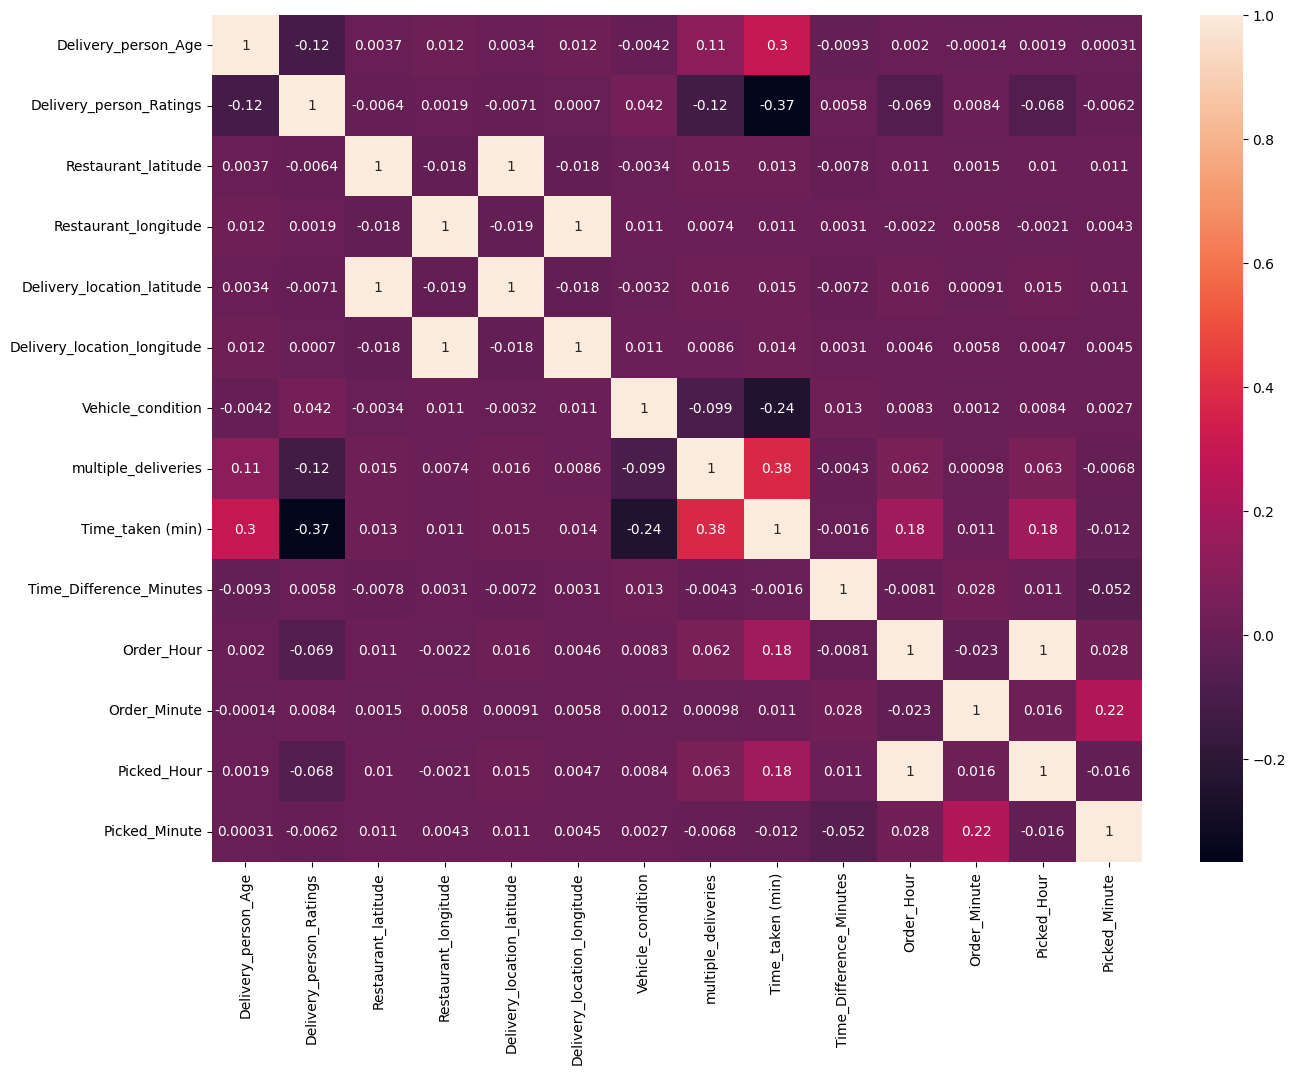

In [31]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [32]:
num_columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Time_Difference_Minutes',
       'Order_Hour', 'Order_Minute', 'Picked_Hour', 'Picked_Minute'],
      dtype='object')

<AxesSubplot: >

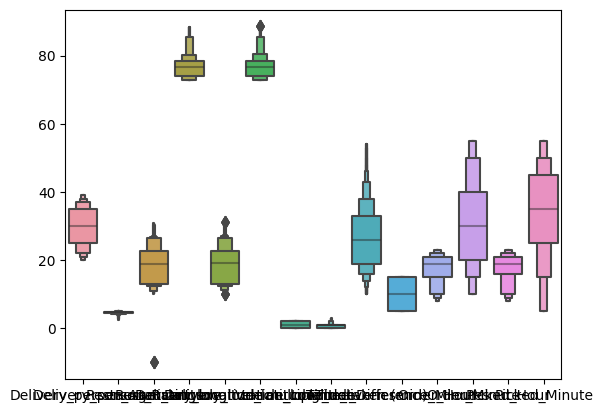

In [33]:
sns.boxenplot(df[num_columns])